In [3]:
#!unzip DAV2025_2.zip
#!rm -rf __MACOSX/

In [ ]:
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

1. Считайте котировки ценных бумаг с указанными ниже тикерами за 2022 год:
 TSLA	Tesla Inc
 ADBE 	Adobe Inc.
 UEC	Uranium Energy
и вычислите дневные доходности ценных бумаг. 
2. Определите ценную бумагу, имеющую минимальную медиану дневной доходности, и постройте график изменения ее стоимости.
3. Для ценной бумаги, имеющей минимальную дневную доходность, постройте столбчатую диаграмму для дневных доходностей.
4. Для ценной бумаги, имеющей минимальную дисперсию дневной доходности, постройте и визуализируйте эмпирическую плотность распределения дневной доходности.
5. Вычислите матрицу ковариации дневных доходностей ценных бумаг и для пары ценных бумаг с наиболее высокой ковариацией постройте диаграмму рассеяния дневной доходности ценных бумаг

### Считываем катировки и вычисляем дневные доходности
____

In [ ]:
# Define a list of ticker symbols to download
tickers = ["TSLA", "ADBE", "UEC"]

# Download data for each ticker, grouping by 'Ticker'
# to structure the DataFrame with multi-level columns
all_data = yf.download(
    tickers,
    group_by="Ticker",
    start=dt.datetime(2022, 1, 1),
    end=dt.datetime(2022, 12, 31),
    auto_adjust=True,
)

# Transform the DataFrame: stack the ticker symbols to create
# a multi-index (Date, Ticker), then reset the 'Ticker' level
# to turn it into a column
data = (
    all_data.stack(level=0, future_stack=True)
    .rename_axis(["Date", "Ticker"])
    .reset_index(level=1)
)
data.head()

[*********************100%***********************]  3 of 3 completed


Price,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2022-01-03,UEC,3.560000,3.840000,3.520000,3.700000,10720300
2022-01-03,TSLA,382.583344,400.356659,378.679993,399.926666,103931400
2022-01-03,ADBE,566.650024,575.000000,553.270020,564.369995,2862700
2022-01-04,UEC,3.850000,3.850000,3.630000,3.810000,8161500
2022-01-04,TSLA,396.516663,402.666656,374.350006,383.196655,100248300


In [24]:
data.sample(5)

Price,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2022-10-24,TSLA,205.820007,213.500000,198.589996,211.250000,100446800
2022-11-09,TSLA,190.779999,195.889999,177.119995,177.589996,127062700
2022-12-21,TSLA,139.339996,141.259995,135.889999,137.570007,145417400
2022-08-04,TSLA,311.000000,313.606659,305.000000,308.633331,72256200
2022-02-07,UEC,2.750000,2.880000,2.730000,2.770000,6795000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2022-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  753 non-null    object 
 1   Open    753 non-null    float64
 2   High    753 non-null    float64
 3   Low     753 non-null    float64
 4   Close   753 non-null    float64
 5   Volume  753 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 41.2+ KB


In [ ]:
daily_close_pr = (
    data[["Ticker", "Close"]]
    .reset_index()
    .pivot(index="Date", columns="Ticker", values="Close")
)
daily_close_pr

Ticker,ADBE,TSLA,UEC
Date,,,
2022-01-03,564.369995,399.926666,3.70
2022-01-04,554.000000,383.196655,3.81
2022-01-05,514.429993,362.706665,3.86
2022-01-06,514.119995,354.899994,3.68
2022-01-07,510.700012,342.320007,3.88
...,...,...,...
2022-12-23,338.450012,123.150002,3.73
2022-12-27,335.089996,109.099998,3.79
2022-12-28,328.329987,112.709999,3.68


In [31]:
daily_pct_change = daily_close_pr.pct_change().iloc[1:]
daily_pct_change

Ticker,ADBE,TSLA,UEC
Date,,,
2022-01-04,-0.018374,-0.041833,0.029730
2022-01-05,-0.071426,-0.053471,0.013123
2022-01-06,-0.000603,-0.021523,-0.046632
2022-01-07,-0.006652,-0.035447,0.054348
2022-01-10,0.029626,0.030342,-0.030928
...,...,...,...
2022-12-23,0.005735,-0.017551,0.027548
2022-12-27,-0.009928,-0.114089,0.016086
2022-12-28,-0.020174,0.033089,-0.029024


array([[<Axes: title={'center': 'ADBE'}>,
        <Axes: title={'center': 'TSLA'}>],
       [<Axes: title={'center': 'UEC'}>, <Axes: >]], dtype=object)

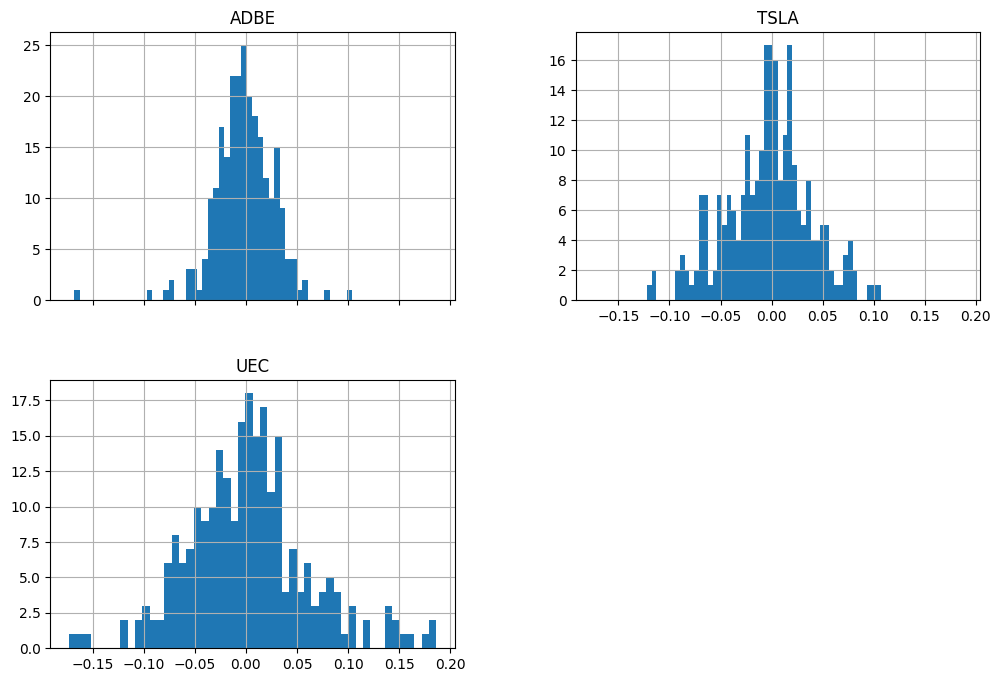

In [ ]:
daily_pct_change.hist(bins=50, sharex=True, figsize=(12, 8))

### Компания с минимальной медианой доходности

ADBE


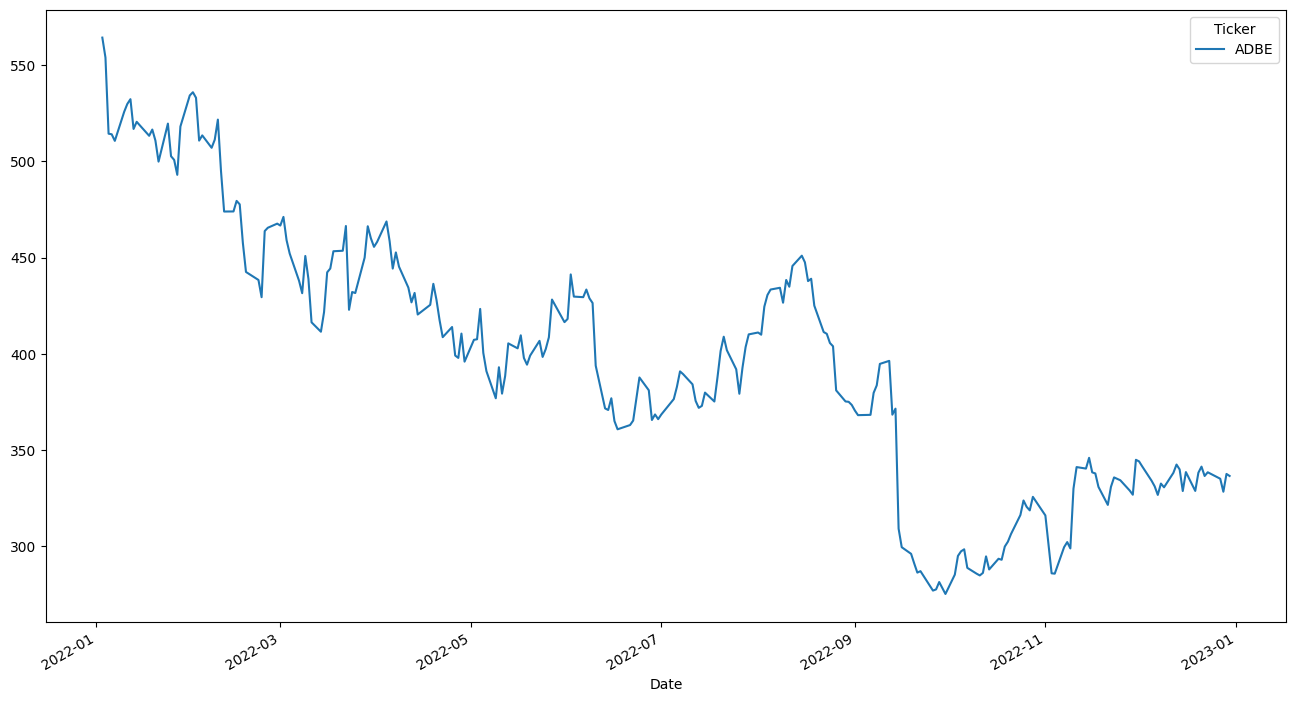

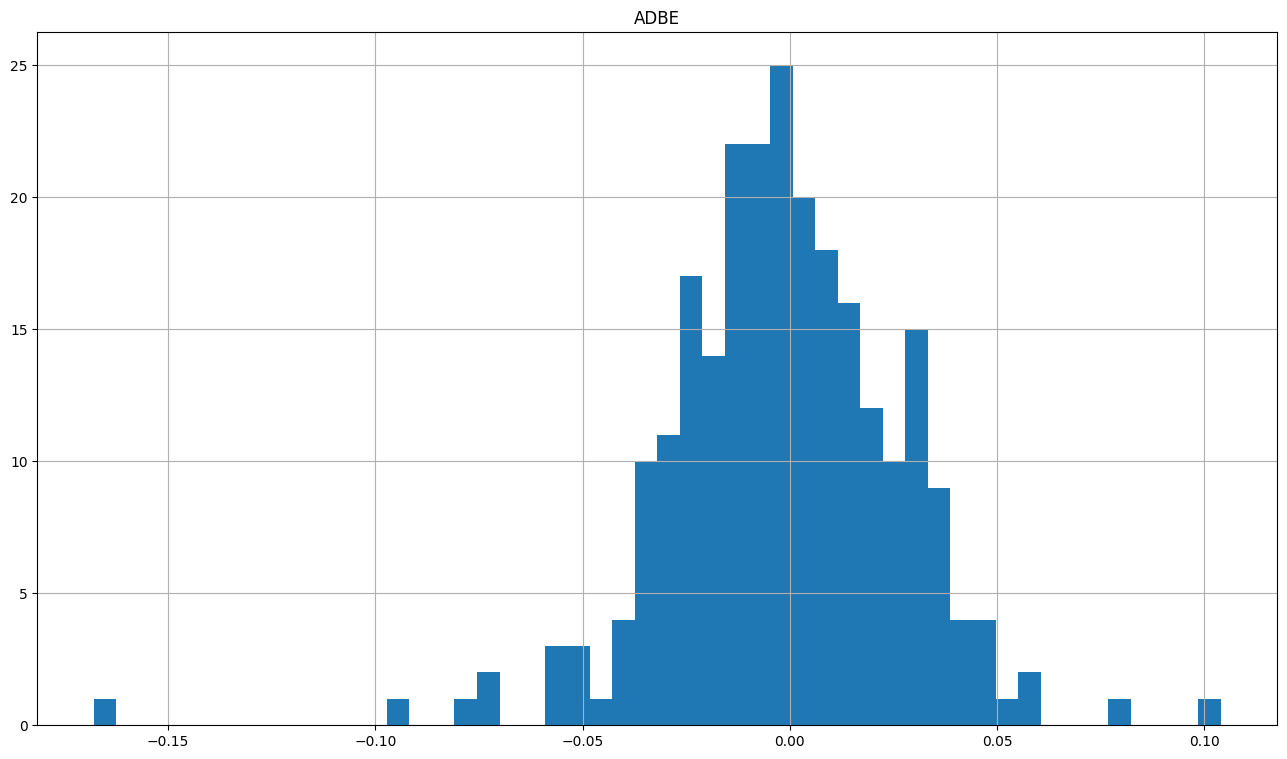

In [ ]:
for i in daily_pct_change.columns:
    if daily_pct_change[i].median() == min(
        daily_pct_change.ADBE.median(),
        daily_pct_change.TSLA.median(),
        daily_pct_change.UEC.median(),
    ):
        print(i)
        daily_close_pr[[i]].plot(figsize=(16, 9))
        daily_pct_change[[i]].hist(bins=50, sharex=True, figsize=(16, 9))

### Минимальная дисперсия
___

ADBE


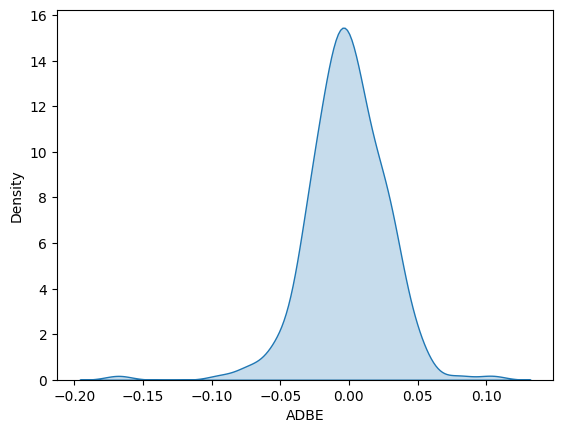

In [ ]:
for i in daily_pct_change.columns:
    if daily_pct_change[i].var() == min(
        daily_pct_change.ADBE.var(),
        daily_pct_change.TSLA.var(),
        daily_pct_change.UEC.var(),
    ):
        print(i)
        sns.kdeplot(daily_pct_change[i], fill=True)

### Максимальная ковариация
___

<Axes: xlabel='Ticker', ylabel='Ticker'>

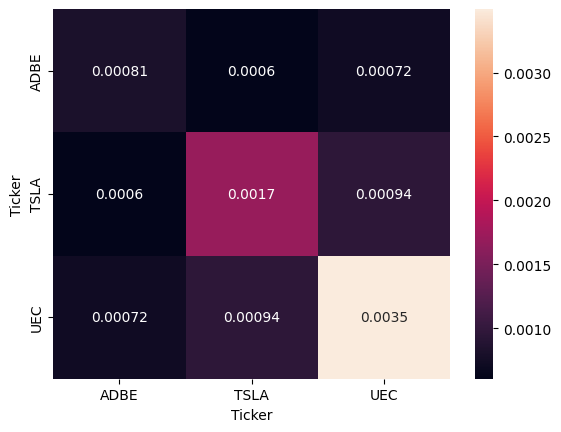

In [53]:
sns.heatmap(daily_pct_change.cov(), annot=True)

<Axes: xlabel='Ticker', ylabel='Ticker'>

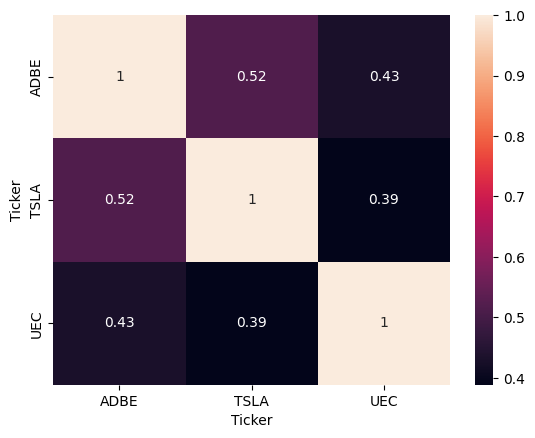

In [59]:
sns.heatmap(daily_pct_change.corr(), annot=True)

максимальная ковариация у TSLA и UEC

<Axes: xlabel='TSLA', ylabel='UEC'>

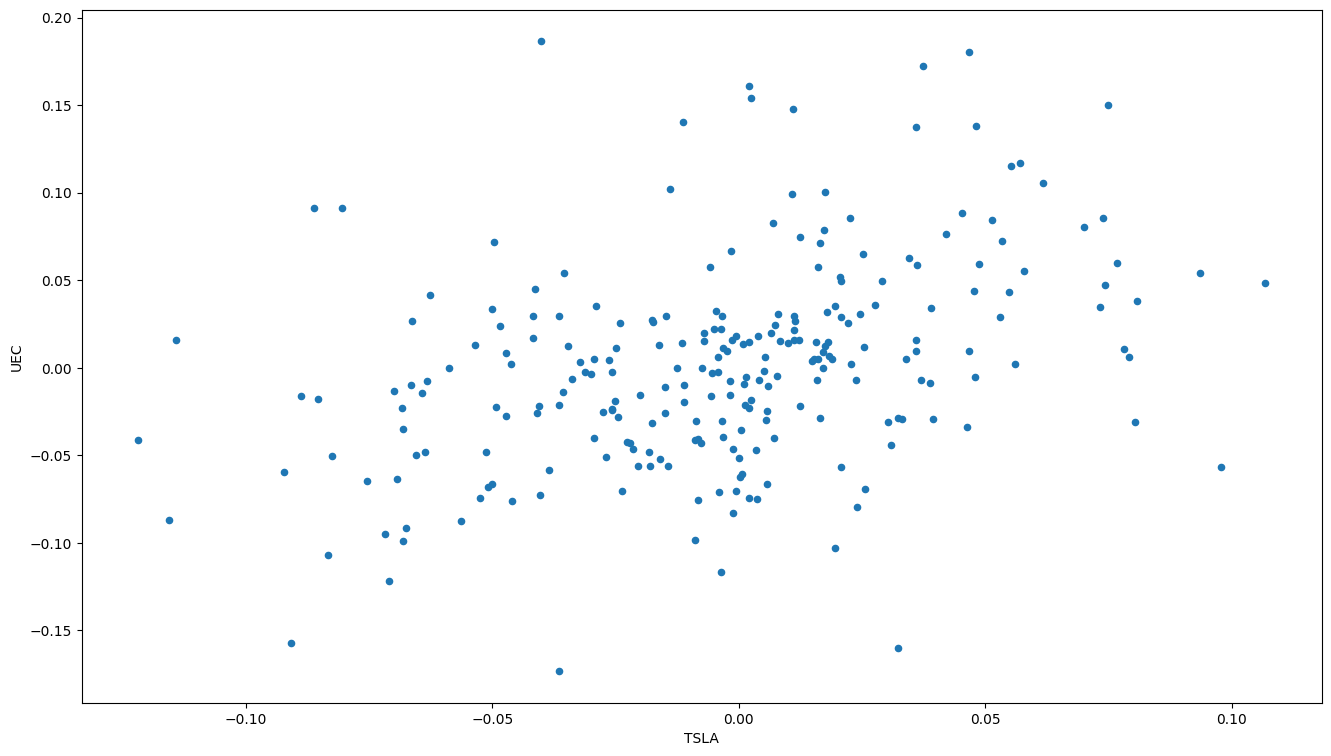

In [68]:
daily_pct_change.plot.scatter("TSLA", "UEC", figsize=(16, 9))

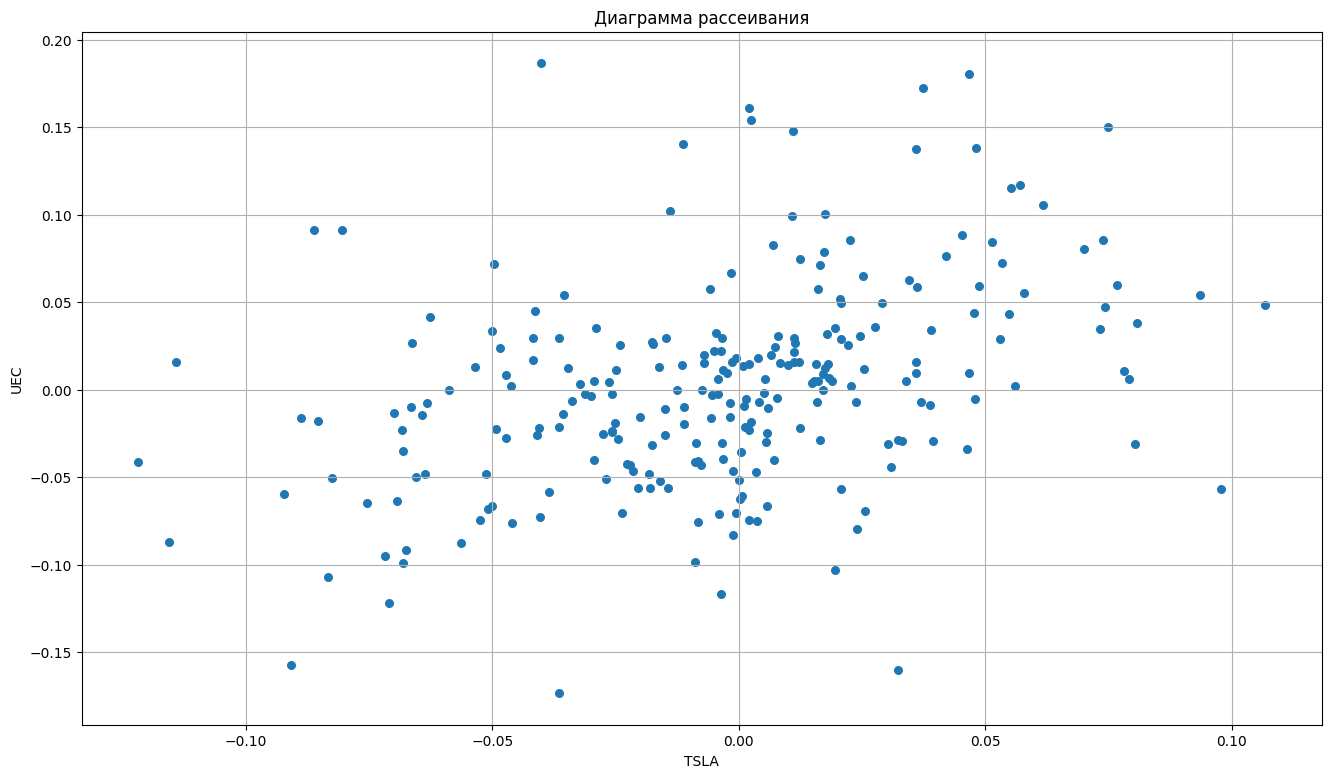

In [80]:
plt.figure(figsize=(16, 9))

plt.scatter(daily_pct_change.TSLA, daily_pct_change.UEC, s=30)
plt.xlabel("TSLA")
plt.ylabel("UEC")
plt.title("Диаграмма рассеивания")
plt.grid(True)
plt.show()